In [ ]:
# Для import mglearn и для boston
!pip install scikit-learn==1.1.1 -i https://pypi.tuna.tsinghua.edu.cn/simple
# <Restart runtime>
!pip install mglearn
!pip install --upgrade joblib==1.1.0

from sklearn.datasets import load_boston

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
boston = load_boston()
X = boston.data
y = boston.target
X_df = pd.DataFrame(X)
X_df

In [32]:
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0)
gbrt = GradientBoostingRegressor(random_state=0)
gbrt.fit(X_train, y_train)

print("Правильность на обучающем наборе {:.3f}".format(gbrt.score(X_train, y_train)))
print("Правильность на тестовом наборе {:.3f}".format(gbrt.score(X_test, y_test)))


Правильность на обучающем наборе 0.983
Правильность на тестовом наборе 0.815


In [15]:
for i in range(len(gbrt.feature_importances_)):
  print("{}: {}".format(boston.feature_names[i], gbrt.feature_importances_[i]))

CRIM: 0.02830222394569793
ZN: 1.797198678806504e-06
INDUS: 0.003169831413420418
CHAS: 0.0005972368896227864
NOX: 0.021272109977023557
RM: 0.30920851844084984
AGE: 0.005469833571310372
DIS: 0.06291592269683832
RAD: 0.0014373847161974734
TAX: 0.015064065952002603
PTRATIO: 0.04527690601013221
B: 0.00643416562973553
LSTAT: 0.5008500035584903


Text(0, 0.5, 'Признак')

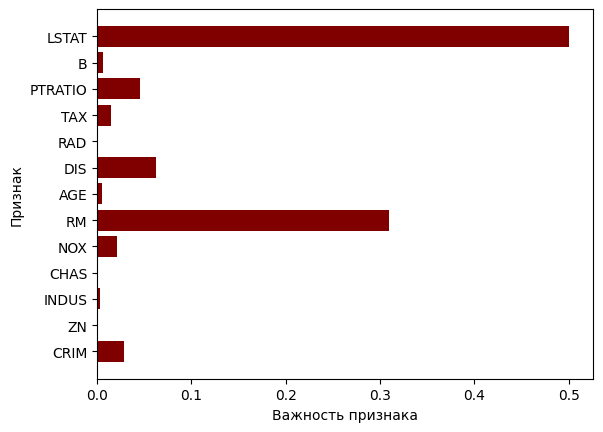

In [17]:
n_features = {}
for i in range(len(gbrt.feature_importances_)):
  n_features[boston.feature_names[i]] = gbrt.feature_importances_[i]
courses = list(n_features.keys())
values = list(n_features.values())
plt.barh(courses, values, color='maroon')
plt.xlabel("Важность признака") 
plt.ylabel("Признак") 

In [26]:
print(boston.DESCR)
print(boston.feature_names)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [82]:
data = np.vstack([X_test, X_train]) 
data = pd.DataFrame(data)
data = data[5]
col = [i for i in range(9)]
for i in data:
  col[int(i)] += 1

col = np.array(col)
print(col)

[  0   1   2   5  17 163 275  58  21]


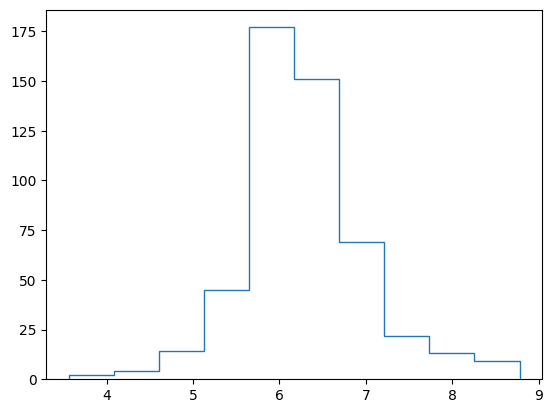

In [83]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(data)
plt.stairs(counts, bins)

0      6.333
1      6.216
2      6.373
3      5.349
4      6.232
       ...  
501    5.708
502    7.178
503    6.021
504    6.030
505    5.572
Name: 5, Length: 506, dtype: float64


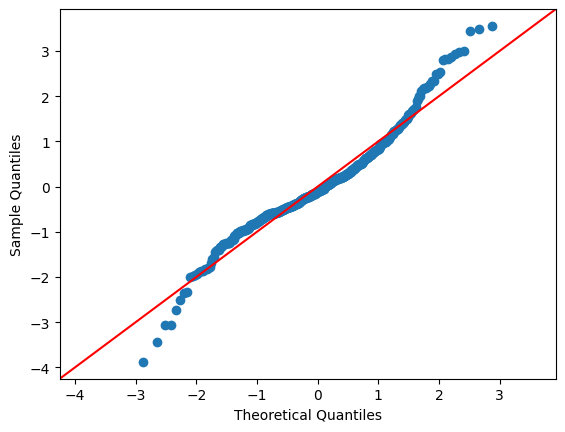

In [84]:
print(data)
import statsmodels.api as sm
import matplotlib.pyplot as plt

data -= np.mean(data)
data /= np.std(data)

fig = sm.qqplot(data, line='45')
plt.show()

In [85]:
from scipy.stats import shapiro

shapiro(data)

ShapiroResult(statistic=0.9608711004257202, pvalue=2.4108812168854854e-10)

In [86]:
from scipy.stats import anderson
anderson(data)

AndersonResult(statistic=6.1177220513370685, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-1.0531759917392789e-16, scale=1.0009896093465716)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [87]:
from scipy.stats import kstest

kstest(data, 'norm')

KstestResult(statistic=0.08180804934932318, pvalue=0.002151724600913201, statistic_location=0.29969919521337846, statistic_sign=1)

In [93]:
from random import choice as ch

In [95]:
monetka = [0, 1]
vip = []
for i in range(1000000):
  vip.append(ch(monetka))
print(vip.count(1)/len(vip))

0.500032


In [99]:
kost = [1, 2, 3, 4, 5, 6]
vip2 = []
for i in range(1000000):
  vip2.append(ch(kost))
print((vip2.count(5)+vip2.count(6))/len(vip2))

0.333128


In [104]:
days = [i for i in range(1, 366)]
vip3 = []
for i in range(10000):
  dr = []
  for i in range(23):
    dr.append(ch(days))
  if len(set(dr))==23:
    vip3.append(1)
  else:
    vip3.append(0)
print((vip3.count(1))/len(vip3))

0.4957


In [141]:
import random

bilets = [i for i in range(30)]
vip4 = []


for i in range(1, 30):
  prom = []
  for j in range(1000):
    moi = random.choices(bilets, k=20)
    do = random.choices(bilets, k=(i))
    for _ in range(100):
      v = random.choices(do)
      if v[0] in moi:
        prom.append(1)
      else:
        prom.append(0)
  vip4.append((prom.count(1))/len(prom))


print(vip4)

[0.479, 0.49324, 0.48282, 0.49453, 0.49331, 0.48675, 0.4959, 0.48417, 0.48161, 0.50421, 0.49152, 0.49024, 0.49737, 0.48771, 0.48873, 0.48579, 0.49281, 0.49202, 0.4913, 0.49961, 0.49252, 0.49477, 0.49573, 0.49041, 0.49424, 0.48865, 0.49245, 0.49705, 0.4895]


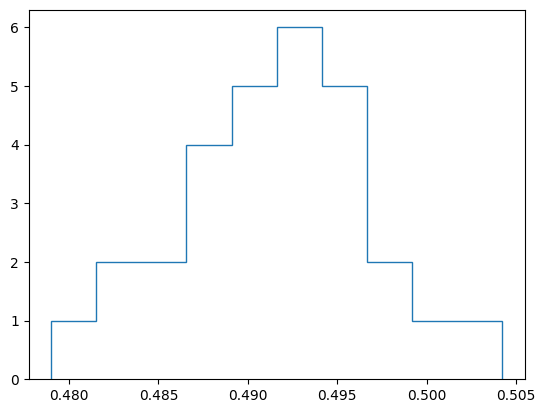

In [147]:
import matplotlib.pyplot as plt

counts, bins = np.histogram(vip4)
plt.stairs(counts, bins)

In [157]:
import random
cars =  [1 for i in range(8500)] + [0 for i in range(1500)]
vid = [1 for i in range(80)] + [0 for i in range(20)]
vip5 = []
pr = []

for i in range(1000000):
  zv = ch(cars)
  uv = ch(vid)
  if (zv == 0 and uv == 1):
    pr.append(1)
  else:
    pr.append(0)
  if (zv == 0 and uv == 1) or (zv == 1 and uv == 0):
    vip5.append(1)
  else:
    vip5.append(0)
print((pr.count(1))/len(pr))
print((vip5.count(1))/len(vip5))
print((pr.count(1))/(vip5.count(1)))

0.120335
0.290089
0.41482096873718066
